In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time
import ot
import os
import seaborn as sns
from datetime import datetime

In [2]:
sns.set_style("whitegrid")

In [19]:
ticker1 = 'GILD'
ticker2= 'GSK'
log_dir = './{}_{}_logs'.format(ticker1, ticker2)

In [20]:
res = pd.read_csv('{}/{}_{}.csv'.format(log_dir, ticker1, ticker2))

In [21]:
res['Ratios'].min()

0.7960747100926463

In [ ]:
# sns.displot(res['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.96, 1.0, num=9), height=4, aspect=1.6)
# plt.xticks(np.linspace(0.96, 1.0, num=9), fontsize=15)
# plt.yticks(fontsize=14)
# plt.xlabel('Ratios', fontsize = 14)
# plt.ylabel('Proportion', fontsize = 14)
# plt.savefig('{}/{}_{}.pdf'.format(log_dir, ticker1, ticker2), format='pdf',
#             dpi=1000, bbox_inches='tight', pad_inches=0.1)

Text(1.6944444444444446, 0.5, 'Proportion')

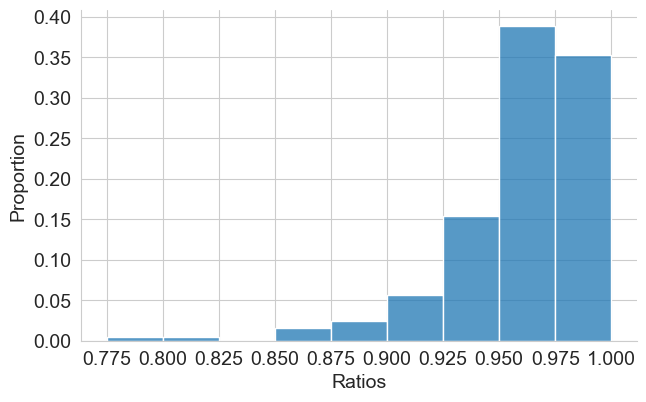

In [22]:
#### For GILD_GSK
sns.displot(res['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.775, 1.0, num=10), height=4, aspect=1.6)
plt.xticks(np.linspace(0.775, 1.0, num=10), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
# plt.savefig('{}/{}_{}.pdf'.format(log_dir, ticker1, ticker2), format='pdf',
#             dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [23]:
res[::40]

,time0,time1,time2,strike,MOT_max,MOT_min,McCormick_max,McCormick_min,Ratios
0,2022-02-28,2022-03-04,2022-04-01,50,1.885826,1.354467,1.884135,1.358227,0.989743
40,2022-04-26,2022-04-29,2022-05-27,52,2.037078,1.447860,2.035355,1.449192,0.994816
80,2022-06-23,2022-06-24,2022-07-22,52,1.304322,0.879231,1.264577,0.887300,0.887520
120,2022-08-26,2022-09-02,2022-09-30,47,1.189717,0.878304,1.171764,0.897830,0.879647
160,2022-10-24,2022-10-28,2022-11-25,50,1.489015,0.664301,1.483622,0.668413,0.988475
200,2022-12-20,2022-12-23,2023-01-20,59,1.661537,1.088605,1.649429,1.092532,0.972012
240,2023-02-17,2023-02-24,2023-03-24,60,1.199659,0.681775,1.197152,0.688668,0.981851


In [12]:
print(res[::40].to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.5f}".format,
                 ))

\begin{tabular}{lllrrrrrr}
\toprule
     time0 &      time1 &      time2 &  strike &  MOT\_max &  MOT\_min &  McCormick\_max &  McCormick\_min &  Ratios \\
\midrule
2022-02-28 & 2022-03-04 & 2022-04-01 &      50 &  1.95524 &  1.22013 &        1.95051 &        1.22335 & 0.98918 \\
2022-04-26 & 2022-04-29 & 2022-05-27 &      52 &  1.99773 &  1.39980 &        1.99376 &        1.40194 & 0.98978 \\
2022-06-23 & 2022-06-24 & 2022-07-22 &      52 &  1.30432 &  0.87923 &        1.26458 &        0.88730 & 0.88752 \\
2022-08-26 & 2022-09-02 & 2022-09-30 &      47 &  1.35285 &  1.05204 &        1.31280 &        1.06299 & 0.83047 \\
2022-10-24 & 2022-10-28 & 2022-11-25 &      50 &  1.46885 &  0.67285 &        1.46224 &        0.69153 & 0.96822 \\
2022-12-20 & 2022-12-23 & 2023-01-20 &      59 &  1.65763 &  1.11048 &        1.63776 &        1.11986 & 0.94653 \\
2023-02-17 & 2023-02-24 & 2023-03-24 &      60 &  1.18887 &  0.66710 &        1.18599 &        0.67470 & 0.97990 \\
\bottomrule
\end{tabula

C:\Users\Sakura\AppData\Local\Temp\ipykernel_10580\3149800332.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(res[::40].to_latex(index=False,


In [ ]:
with open('{}/{}_{}_px1.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    px1 = pickle.load(fp)

with open('{}/{}_{}_X1.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    X1 = pickle.load(fp)

In [ ]:
px1[0]

In [ ]:
X1[0]